## This notebook contains examples for 3D visualization tools/functions of DPM Tools.

Installing dpm_tools.

In [6]:
# import os
# os.chdir('/home1/09429/cinarturhan/GitHub/')
# !pip install -e dpm_tools
# os.chdir('/home1/09429/cinarturhan/GitHub/dpm_tools/examples')

Importing the required packages.

In [24]:
import requests
import numpy as np
import glob
import pyvista as pv
pv.set_jupyter_backend('server')

Importing visualization moduel of the dpm_tools package.

In [4]:
from dpm_tools import visualization as dpm_vis
from dpm_tools import io

Defining a function to download data from Digital Rocks Portal. The data is x-ray microtomography data from the Network Generation Comparison Forum and is available on the Digital Rocks Portal (https://www.digitalrocksportal.org/projects/16).

In [3]:
# Function to download files
def download_file_url(file_url,filename):
    # download file
    r = requests.get(file_url, stream = True) 

    with open(filename,"wb") as f: 
        for chunk in r.iter_content(chunk_size=1024): 

             # writing one chunk at a time to pdf file 
             if chunk: 
                 f.write(chunk)
    return()

# Downloading the data
parent_dir = '../data/'
file_names = ['gambier.ubc', 'beadpack.ubc', 'sandpack.ubc', 'castlegate.ubc']
file_dirs = [parent_dir+file for file in file_names]
file_links = ['https://www.digitalrocksportal.org/projects/16/images/65565/download/',
              'https://www.digitalrocksportal.org/projects/16/images/65563/download/',
              'https://www.digitalrocksportal.org/projects/16/images/65566/download/',
              'https://www.digitalrocksportal.org/projects/16/images/65564/download/']

for i in range(0,len(file_dirs)):
    download_file_url(file_links[i],file_dirs[i])

Checking the image list and importing the data to the notebook. We have preprocessed the data to have solid and pore labeled as 0 and 1, respectively.

In [5]:
# Checking image list
img_list = sorted(glob.glob('../data/*.ubc'))
print(img_list)

# Reading Images
beadpack, castlegate, gambier, sandpack = [np.fromfile(img,dtype='uint8') for img in img_list]

# Reshaping Images
gambier = gambier.reshape((512,512,512))
castlegate = castlegate.reshape((512,512,512))
beadpack = beadpack.reshape((512,512,512))
sandpack = sandpack.reshape((512,512,512))

# # Inverting the binary arrays (switching void and solid phases)
# gambier = np.invert(gambier==True).astype('uint8')
# castlegate = np.invert(castlegate==True).astype('uint8')
# beadpack = np.invert(beadpack==True).astype('uint8')
# sandpack = np.invert(sandpack==True).astype('uint8')

['../data/beadpack.ubc', '../data/castlegate.ubc', '../data/gambier.ubc', '../data/sandpack.ubc']


Getting a subset from the data for faster visualization.

In [6]:
sandpack = sandpack[0:100, 0:100, 0:100]
image = io.Image(scalar=sandpack)

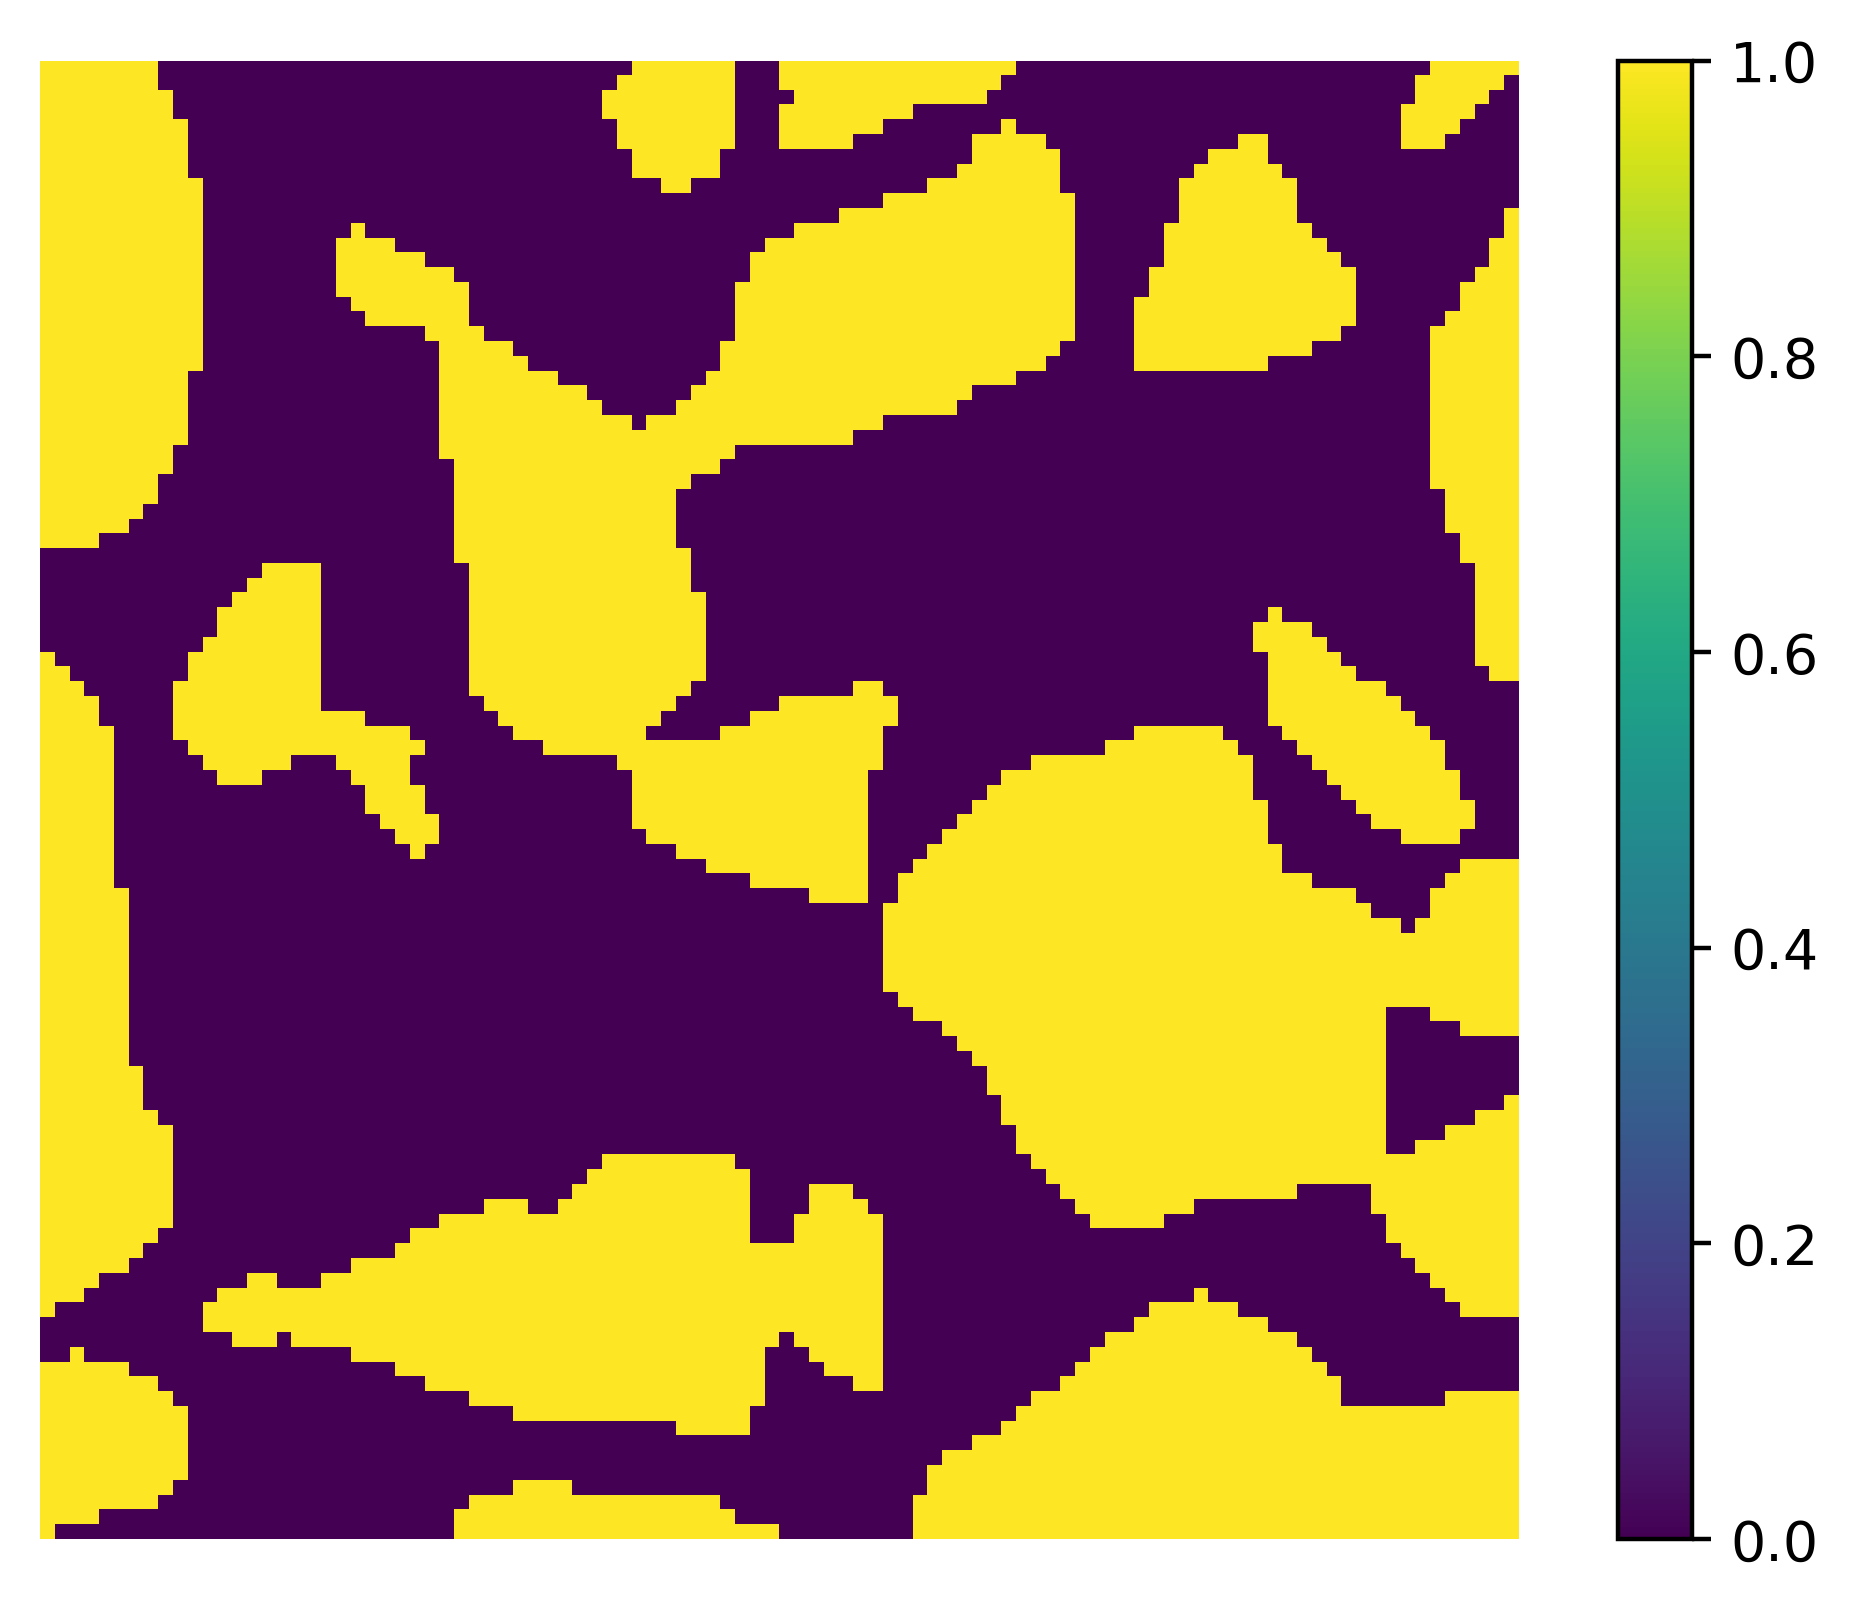

In [39]:
p = dpm_vis.plot_slice(image, slice_num=50)

In [25]:
p = dpm_vis.plot_isosurface(image, show_isosurface=[0.5])
p.show()

Widget(value='<iframe src="http://localhost:45479/index.html?ui=P_0x7f45a7cd6610_3&reconnect=auto" class="pyvi…

In [29]:
p = dpm_vis.orthogonal_slices(image, slider=True)
p.show()

/home/gomathecat/myvenvs/dpm_tools_venv/lib64/python3.11/site-packages/pyvista/core/utilities/misc.py:207: UserWarning: Encountered issue in callback (most recent call last):
  File "/home/gomathecat/github/dpm_tools/dpm_tools/visualization/_plot_3d.py", line 81, in <lambda>
    fig.add_slider_widget(callback=lambda value: engine('z', int(value)),
                                                 ^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/gomathecat/github/dpm_tools/dpm_tools/visualization/_plot_3d.py", line 67, in __call__
    self.update()
  File "/home/gomathecat/github/dpm_tools/dpm_tools/visualization/_plot_3d.py", line 74, in update
    self.output.copy_from(result)
    ^^^^^^^^^^^^^^^^^^^^^
  File "/home/gomathecat/myvenvs/dpm_tools_venv/lib64/python3.11/site-packages/pyvista/core/dataobject.py", line 52, in __getattr__
    return super().__getattribute__(item)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'MultiBlock' object has no attribute 'copy_from'
  warnings.warn(fo

Widget(value='<iframe src="http://localhost:45479/index.html?ui=P_0x7f45a7cc9990_6&reconnect=auto" class="pyvi…

In [33]:
p = dpm_vis.plot_medial_axis(image, show_isosurface=[0.5])
p.show()

/home/gomathecat/github/dpm_tools/dpm_tools/visualization/_plot_3d.py:453: UserWarning: 

No value provided for 'show_isosurfaces' keyword.Using the midpoint of the isosurface array instead (0,1).

  fig = plot_isosurface(data, fig=fig, mesh_kwargs=mesh_kwargs)


Widget(value='<iframe src="http://localhost:45479/index.html?ui=P_0x7f45380a7d90_9&reconnect=auto" class="pyvi…